## Neural Network Model

A neural network model (NNM) is a type of machine learning model that is loosely modeled after the structure and function of the human brain. It consists of a large number of interconnected processing nodes, or "neurons," that work together to process input data and make predictions or classifications. 

For this project, we utilised Keras, a high-level neural netowkrs API, written in Python. The basic building block of a Keras model is a layer. Layers are stacked together to form a neural network model, and each layer is responsible for performing a specific transformation on its inputs. The output of one layer becomes the input of the next layer until the final output layer produces the model’s predictions.

 We have used this model to predict bankruptcy and performed analysis based on the following steps:
1. Preparing data (obtain top 10 features, obtain train and test sets)
2. Training NNM on full dataset (all 95 features)
3. Training NNM with only top 10 features
4. Evaluating the performance of each model by generating ROC and AUC, and comparing the classification reports of each model

**Conclusion**

Using this Neural Network model, we concluded that the model trained on the full dataset (Model 1) is more accurate (**94.17%**) compared to the model trained on the top 10 variables (Model 2) (**87.20%**). Plotting the ROC and obtaining the AUC, we obtained an AUC of **0.9839** for Model 1 and **0.9462** for Model 2. We can conclude that the NNM is thus able to distinguish between positive and negative cases very well, and is an almost perfect classifier.


### 1. Preparing Data

##### a) Importing necessary libraries and load upsampled dataset

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_curve, auc


In [70]:
# Load the data from CSV file
df = pd.read_csv("upsampled_bankruptcy.csv")


##### b) Splitting data into test and training sets (all 95 variables)

In [71]:
# Display new class counts
df["Bankrupt?"].value_counts()
X_upsample = df.drop("Bankrupt?", axis=1)
y_upsample = df["Bankrupt?"]

X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = train_test_split(X_upsample, y_upsample, test_size=0.2,random_state=42)
y_upsample.value_counts()



0    6599
1    6599
Name: Bankrupt?, dtype: int64

##### c) Splitting data into test and training sets (top 10 variables)

In [72]:
# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy

corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10_upsampled = df[top_corr_features]
X_top10_upsample = df_top10_upsampled
y_top10_upsample = df["Bankrupt?"]
X_train_top10_upsample, X_test_top10_upsample, y_train_top10_upsample, y_test_top10_upsample = train_test_split(X_top10_upsample, y_top10_upsample, test_size=0.2,random_state=42)

### 2. Training NNM on full dataset

##### a) Building Neural network

Overall, this model architecture consists of three fully connected layers with ReLU activation functions, followed by BatchNormalization and Dropout layers to improve model performance and prevent overfitting, and a final output layer with a sigmoid activation function for binary classification.

In [73]:
# Build the neural network model


# model for upsampled data (All)

model_upsample_all = Sequential()
model_upsample_all.add(Dense(128, input_dim=X_train_upsample.shape[1], activation='relu'))
model_upsample_all.add(BatchNormalization())
model_upsample_all.add(Dense(64, activation='relu'))
model_upsample_all.add(Dropout(0.2))
model_upsample_all.add(Dense(32, activation='relu'))
model_upsample_all.add(Dense(1, activation='sigmoid'))
model_upsample_all.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##### b) Compiling the model 

model.compile is a function in Keras that compiles the model with the chosen loss function, optimizer, and metrics. 

In this case, the loss function chosen is binary_crossentropy, which is commonly used for binary classification problems. The optimizer chosen is adam, which is a commonly used optimization algorithm for neural networks. Finally, metrics is set to accuracy, which will be used to evaluate the performance of the model during training and testing.

In [74]:

# compile the model for all variables with upsampled dataset

model_upsample_all.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


##### c) Training the neural network model

Overall, this line of code is training the neural network model on the upsampled training data, using mini-batch stochastic gradient descent with a batch size of 32 and the binary crossentropy loss function. The model is evaluated on the validation data after each epoch.

In [75]:
# Train the model for all the variables with the upsampled dataset

model_upsample_all.fit(X_train_upsample, y_train_upsample, epochs=50, batch_size=32, validation_data=(X_test_upsample, y_test_upsample))


Epoch 1/50
330/330 [==============================] - 1s 1ms/step - loss: 0.5843 - accuracy: 0.6940 - val_loss: 0.4832 - val_accuracy: 0.7659
Epoch 2/50
330/330 [==============================] - 0s 977us/step - loss: 0.4817 - accuracy: 0.7640 - val_loss: 0.4082 - val_accuracy: 0.8220
Epoch 3/50
330/330 [==============================] - 0s 965us/step - loss: 0.4360 - accuracy: 0.8012 - val_loss: 0.3601 - val_accuracy: 0.8398
Epoch 4/50
330/330 [==============================] - 0s 968us/step - loss: 0.4028 - accuracy: 0.8181 - val_loss: 0.3359 - val_accuracy: 0.8720
Epoch 5/50
330/330 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8252 - val_loss: 0.3123 - val_accuracy: 0.8742
Epoch 6/50
330/330 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8372 - val_loss: 0.3034 - val_accuracy: 0.8610
Epoch 7/50
330/330 [==============================] - 0s 981us/step - loss: 0.3463 - accuracy: 0.8518 - val_loss: 0.2831 - val_accuracy: 0.886

### 3. Training NNM on top 10 variables

In [76]:
# model for upsampled data (Top 10)

model_upsample_top10 = Sequential()
model_upsample_top10.add(Dense(128, input_dim=X_train_top10_upsample.shape[1], activation='relu'))
model_upsample_top10.add(BatchNormalization())
model_upsample_top10.add(Dense(64, activation='relu'))
model_upsample_top10.add(Dropout(0.2))
model_upsample_top10.add(Dense(32, activation='relu'))
model_upsample_top10.add(Dense(1, activation='sigmoid'))
model_upsample_top10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# compile the model for top 10 variables with upsampled dataset

model_upsample_top10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model for top 10 variables with the upsampled dataset

model_upsample_top10.fit(X_train_top10_upsample, y_train_top10_upsample, epochs=50, batch_size=32, validation_data=(X_test_top10_upsample, y_test_top10_upsample))




Epoch 1/50
330/330 [==============================] - 1s 1ms/step - loss: 0.3783 - accuracy: 0.8359 - val_loss: 0.4835 - val_accuracy: 0.8689
Epoch 2/50
330/330 [==============================] - 0s 950us/step - loss: 0.3592 - accuracy: 0.8427 - val_loss: 0.4355 - val_accuracy: 0.7769
Epoch 3/50
330/330 [==============================] - 0s 927us/step - loss: 0.3530 - accuracy: 0.8476 - val_loss: 0.3487 - val_accuracy: 0.8686
Epoch 4/50
330/330 [==============================] - 0s 935us/step - loss: 0.3445 - accuracy: 0.8526 - val_loss: 0.3343 - val_accuracy: 0.8670
Epoch 5/50
330/330 [==============================] - 0s 914us/step - loss: 0.3462 - accuracy: 0.8484 - val_loss: 0.3679 - val_accuracy: 0.8515
Epoch 6/50
330/330 [==============================] - 0s 926us/step - loss: 0.3367 - accuracy: 0.8574 - val_loss: 0.3364 - val_accuracy: 0.8598
Epoch 7/50
330/330 [==============================] - 0s 904us/step - loss: 0.3361 - accuracy: 0.8564 - val_loss: 0.3439 - val_accuracy: 0

### 4. Evaluating Performance of both Models


##### a) Accuracy of our NNMs

In [77]:

#Accuracy for upsampled dataset for all the variables and optimised model
loss_upsample_all, accuracy_upsample_all = model_upsample_all.evaluate(X_test_upsample, y_test_upsample)

print("Accuracy for upsampled dataset with all variables:", accuracy_upsample_all)


#Accuracy for upsampled dataset for top 10 variables and optimised model
loss_upsample_top10, accuracy_upsample_top10 = model_upsample_top10.evaluate(X_test_top10_upsample, y_test_top10_upsample)

print("Accuracy for upsampled dataset with top 10 variables:", accuracy_upsample_top10)

83/83 [==============================] - 0s 491us/step - loss: 0.1575 - accuracy: 0.9417
Accuracy for upsampled dataset with all variables: 0.9416666626930237
83/83 [==============================] - 0s 450us/step - loss: 0.2998 - accuracy: 0.8720
Accuracy for upsampled dataset with top 10 variables: 0.8719696998596191


##### b) Plotting the ROC, AUC and its associated classification report for the NN model (full dataset)

83/83 [==============================] - 0s 480us/step


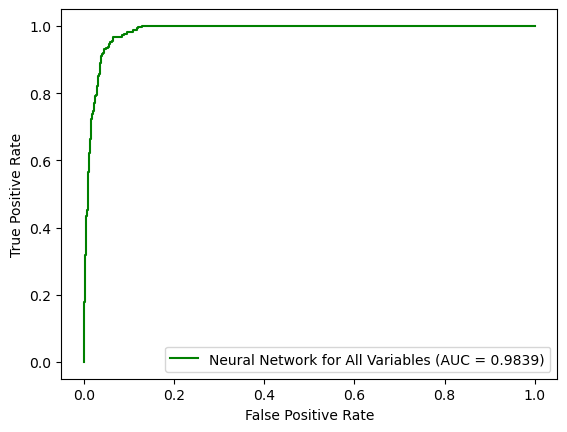

83/83 [==============================] - 0s 383us/step
              precision    recall  f1-score   support

           0     0.9804    0.9021    0.9396      1328
           1     0.9083    0.9817    0.9436      1312

    accuracy                         0.9417      2640
   macro avg     0.9443    0.9419    0.9416      2640
weighted avg     0.9446    0.9417    0.9416      2640

83/83 [==============================] - 0s 455us/step - loss: 0.1575 - accuracy: 0.9417
Test accuracy: 0.9416666626930237


In [78]:


# predict probabilities with neural network model for all variables
nn_probs = model_upsample_all.predict(X_test_upsample)
# compare the predicted probabilities
fpr_nn, tpr_nn, _ = roc_curve(y_test_upsample, nn_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)



plt.plot(fpr_nn, tpr_nn, color='green', label='Neural Network for All Variables (AUC = %0.4f)' % roc_auc_nn)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Predict on test data
y_pred = model_upsample_all.predict(X_test_upsample)

# Convert predicted probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Generate classification report
nn_report = classification_report(y_test_upsample, y_pred, digits = 4)
print(nn_report)


loss, accuracy = model_upsample_all.evaluate(X_test_upsample, y_test_upsample)
print('Test accuracy:', accuracy)



##### b) Plotting the ROC, AUC and its associated classification report for the NN model (top 10 variables)

83/83 [==============================] - 0s 592us/step


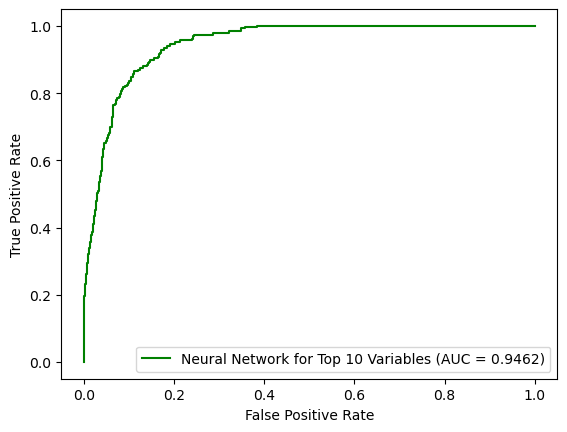

83/83 [==============================] - 0s 441us/step
              precision    recall  f1-score   support

           0     0.9508    0.7861    0.8607      1328
           1     0.8158    0.9588    0.8816      1312

    accuracy                         0.8720      2640
   macro avg     0.8833    0.8725    0.8711      2640
weighted avg     0.8837    0.8720    0.8711      2640

83/83 [==============================] - 0s 470us/step - loss: 0.2998 - accuracy: 0.8720
Test accuracy: 0.8719696998596191


In [79]:
# predict probabilities with neural network model for top 10 variables
nn_probs_top10 = model_upsample_top10.predict(X_test_top10_upsample)
# compare the predicted probabilities
fpr_nn_top10, tpr_nn_top10, _ = roc_curve(y_test_top10_upsample, nn_probs_top10)
roc_auc_nn_top10 = auc(fpr_nn_top10, tpr_nn_top10)

plt.plot(fpr_nn_top10, tpr_nn_top10, color='green', label='Neural Network for Top 10 Variables (AUC = %0.4f)' % roc_auc_nn_top10)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Predict on test data
y_pred = model_upsample_top10.predict(X_test_top10_upsample)

# Convert predicted probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Generate classification report
nn_report_top10 = classification_report(y_test_top10_upsample, y_pred, digits = 4)
print(nn_report_top10)

loss, accuracy = model_upsample_top10.evaluate(X_test_top10_upsample, y_test_top10_upsample)
print('Test accuracy:', accuracy)



storing data for evaluation notebook

In [80]:
%store nn_report
%store model_upsample_all
%store fpr_nn
%store tpr_nn
%store roc_auc_nn

%store model_upsample_top10
%store fpr_nn_top10
%store tpr_nn_top10
%store roc_auc_nn_top10
%store nn_report_top10

Stored 'nn_report' (str)
INFO:tensorflow:Assets written to: ram://376afb56-5208-49aa-bd46-6fb73e17de11/assets
Stored 'model_upsample_all' (Sequential)
Stored 'fpr_nn' (ndarray)
Stored 'tpr_nn' (ndarray)
Stored 'roc_auc_nn' (float64)
INFO:tensorflow:Assets written to: ram://9a8a7c73-08d9-4f9d-90ab-de9a7a22f625/assets
Stored 'model_upsample_top10' (Sequential)
Stored 'fpr_nn_top10' (ndarray)
Stored 'tpr_nn_top10' (ndarray)
Stored 'roc_auc_nn_top10' (float64)
Stored 'nn_report_top10' (str)
